In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq

using PyPlot
using StaticArrays

In [2]:
using JLD

In [3]:
dir_spec = "C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\HR_small_saved\\spectrum_HR_array.jld"
dir_cond = "C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\HR_small_saved\\condition_HR_array.jld"

"C:\\Users\\olenin.s\\Desktop\\dynamical-systems\\Hindmarrh Rose\\probablity density function\\result\\HR_small_saved\\condition_HR_array.jld"

In [4]:
spectrum_array = load(dir_spec)["data"]
condition_HR_array = load(dir_cond)["data"]

6×1001 Matrix{Float64}:
 -1.5  -1.40416   -1.05529   -0.898304  …  -1.16079  -0.952531  -0.798957
  0.0  -8.91851   -4.76027   -3.39811      -6.02688  -3.80106   -2.60755
  0.0   3.75836    3.73025    3.7013        3.55218   3.84761    3.75601
 -2.5  -0.940059  -0.698735  -1.20362      -1.16079  -0.952531  -0.798957
  0.0  -3.37097   -1.90282   -6.09311      -6.02688  -3.80106   -2.60755
  0.0   4.117      3.82588    4.00787   …   3.55218   3.84761    3.75601

In [5]:
function sigma(x)
    return @fastmath 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [6]:
condition = condition_HR_array[:, 156] # k = 0.155
condition

6-element Vector{Float64}:
 -0.6925302979542225
 -2.2083565485726155
  3.4251812063410423
 -0.49710798909310244
 -0.24112901660181446
  4.585643148476261

In [7]:
condition = SA[-0.6925302979542225,
 -2.2083565485726155,
  3.4251812063410423,
 -0.49710798909310244,
 -0.24112901660181446,
  4.585643148476261]

6-element SArray{Tuple{6}, Float64, 1, 6} with indices SOneTo(6):
 -0.6925302979542225
 -2.2083565485726155
  3.4251812063410423
 -0.49710798909310244
 -0.24112901660181446
  4.585643148476261

In [8]:
tspan = (0.0, 500000.0)

a = 1.
b = 3.
c = 1.
d = 5.
xr = -1.6
r = 0.01 # 0.01
s = 5.
I = 4.
xv = 2.

k1= -0.17
k2 = k1
k = 0.155

p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]

12-element SArray{Tuple{12}, Float64, 1, 12} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
 -0.17
 -0.17
  0.155

In [43]:
k_space = range(0.155, 0.1552, step = 0.00001)




spectrum_array = zeros(6, length(k_space))
condition_array = zeros(6, length(k_space))

int(x) = floor(Int, x)
length(k_space)

21

In [44]:
for (i, k) in enumerate(k_space)
    if i == 1
        global initialcondition =  condition
    end
    println("Initial condition: $initialcondition"); flush(stdout)
    println("k: $k"); flush(stdout)
    
    condition_array[:, i] = initialcondition
    
    p = SA[a, b, c, d,
        s, xr, r, I, xv, k1, k2, k]
    
    prob = ODEProblem(HR, initialcondition, tspan, p)
    sol = solve(prob, Vern9(), abstol = 1e-14, reltol = 1e-14, dense=false, maxiters = 30000000)
    println("solve complete"); flush(stdout)
    ds_HR = ContinuousDynamicalSystem(HR, initialcondition, p )
    spectrum = lyapunovspectrum(ds_HR, tspan[2]; diffeq = (alg = Vern9(),
                                                            abstol = 1e-14, reltol = 1e-14,
                                                            maxiters = 30000000
                                                            ))
    spectrum_array[1:6, i] = spectrum[1:6]
    
    println("Spectrum: ", spectrum_array[1:6, i]); flush(stdout)
    
    initialcondition = sol[length(sol.u)]
    println(">>>>>>>>>>>>>")
    println("")
end

Initial condition: [-0.6925302979542225, -2.2083565485726155, 3.4251812063410423, -0.49710798909310244, -0.24112901660181446, 4.585643148476261]
k: 0.155
solve complete
Spectrum: [0.01580975947780991, 0.0030427909998016873, -9.692148517089653e-6, -0.0068372249249998894, -5.810846752905481, -11.862075390294684]
>>>>>>>>>>>>>

Initial condition: [-1.3924490024149438, -8.166231386953486, 4.49095276431138, -0.590098762140052, -0.9743399096433092, 4.107207035329182]
k: 0.15501
solve complete
Spectrum: [0.015421301619687558, 0.003083581027385371, -5.430099289334368e-6, -0.007036675841380449, -5.796467962584421, -11.880413778574125]
>>>>>>>>>>>>>

Initial condition: [-0.3395925247175612, 0.19258362927150485, 4.436692133624976, -0.7437008571140313, -1.9199038848367678, 4.061857868673762]
k: 0.15502
solve complete
Spectrum: [0.016040688799961567, 0.002869716120754173, -3.633142879285124e-6, -0.006998319989167892, -5.823817491380695, -11.848738286812731]
>>>>>>>>>>>>>

Initial condition: [-1.360

LoadError: OutOfMemoryError()

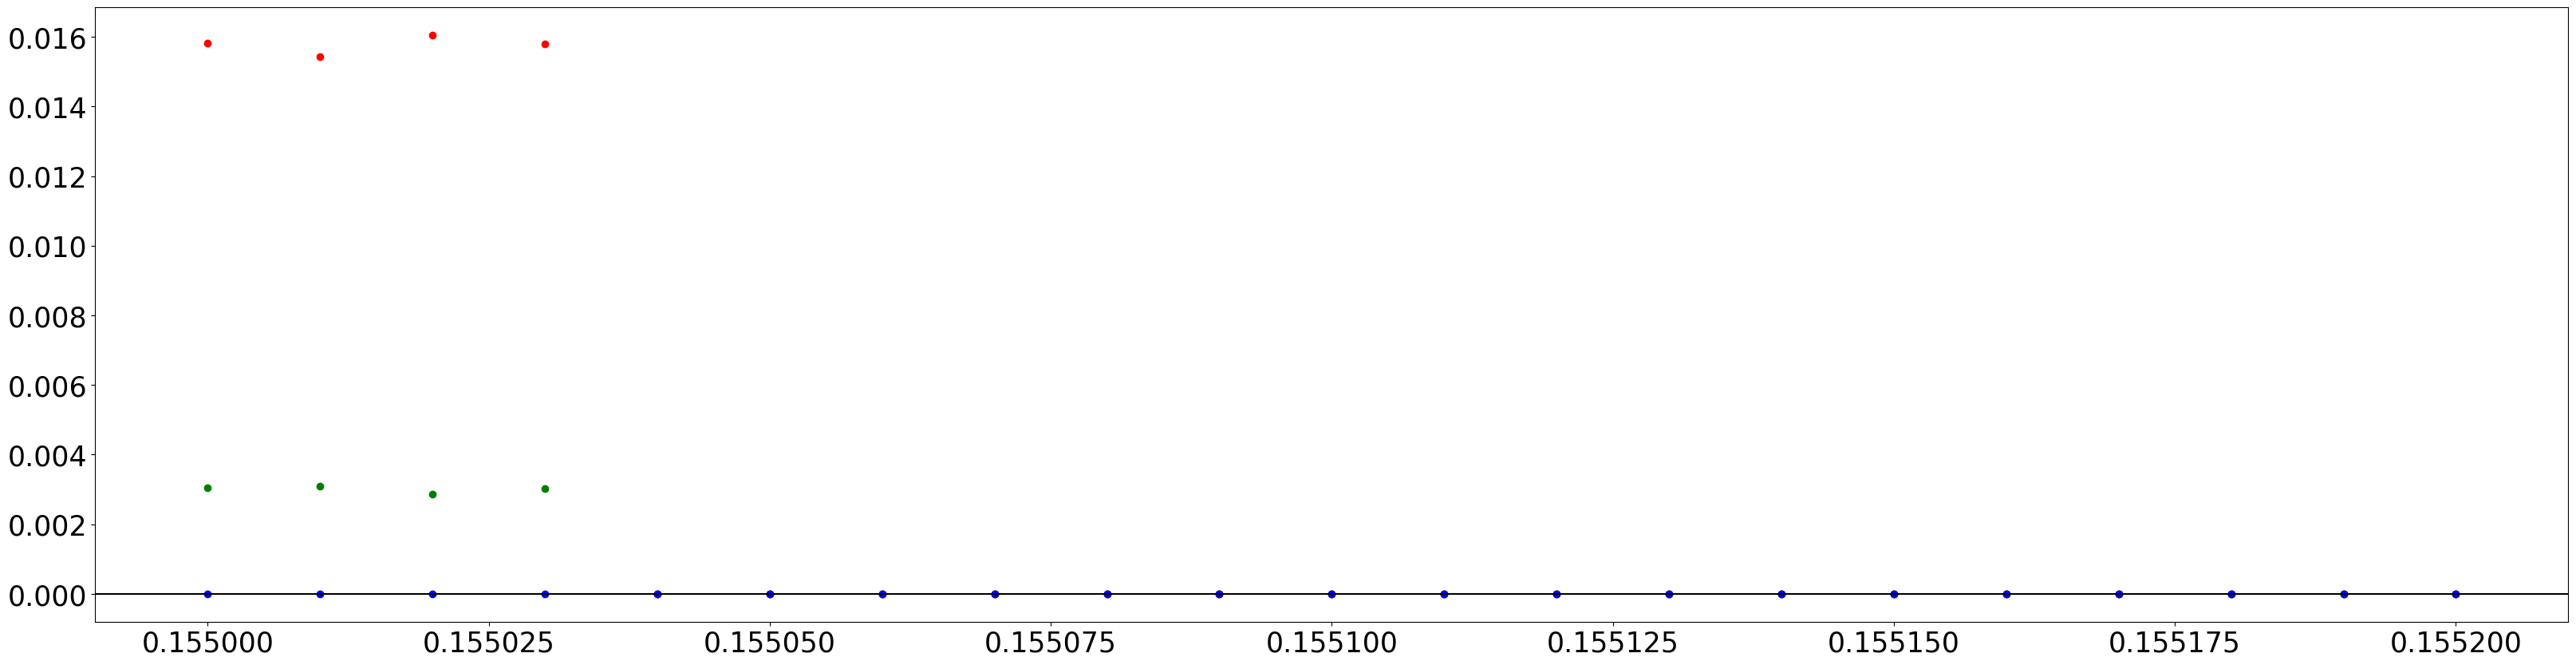

In [45]:
fig, ax = subplots(figsize = (40, 10))


ax.scatter(k_space, spectrum_array[1, :], color = "red")
ax.scatter(k_space, spectrum_array[2, :], color = "green")
ax.scatter(k_space, spectrum_array[3, :], color = "blue")



ax.axhline(0, color = "black")
ax.tick_params(labelsize = 25)